In [1]:
from datetime import date


print("Name- Pratyush Mohanty")
print("Roll No-118CS0180")
print("Date- {}".format(date.today()))
print("Machine learning Lab 10")

Name- Pratyush Mohanty
Roll No-118CS0180
Date- 2021-11-23
Machine learning Lab 10


# Question 1

In [2]:
import numpy as np
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

In [3]:
#Network Layers
hiddenLayerDim = int(input("print Enter dimention of hidden layer\n"))#10
inputDim = 2
outputLayerDim = 1

#Train Parameters
learning_rate = 0.01
error_rate = 0.1

n_trainSample = 300
n_testSample = 150

#Error Functions

print Enter dimention of hidden layer
10


In [4]:

def mean_absolute_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred)))

def mean_squared_error(y_true, y_pred):
    return (np.square(y_true - y_pred)).mean(axis=None)

#Activation Functions

#def sigmoid(x):
#    return 1.0/(1.0 + np.exp(-x)) 

def reLu(x):
    return x*(x>0)

def tanh_deriv(x):
    return  1 - np.tanh(x)**2

#Network Functions

def propagation(x, t,network):

    #network layers are separated for easy understanding
    hiddenLayer = network[0]
    OutputLayer = network[1]
    hiddenBias = network[2]
    outputBias = network[3]
 
    # forward propagation
    A = np.dot(x,hiddenLayer) + hiddenBias
    Z = np.tanh(A)

    B = np.dot(Z,OutputLayer) + outputBias
    Y = reLu(B)
    #loss function
    loss = mean_squared_error(t,Y)

    # backward propagation
    Eout = Y - t
    Ehid = tanh_deriv(A) * np.dot(OutputLayer, Eout)
    dOut = np.outer(Z, Eout)
    dHid = np.outer(x, Ehid)
 
    #update weights
    grad = (dHid, dOut, Ehid, Eout)
    for j in range(len(network)):
        network[j] -= learning_rate * grad[j] 
                  
    return  loss

def initialize_network():
    
    hiddenLayer = np.random.normal(scale=0.1, size=(inputDim, hiddenLayerDim))
    outputLayer = np.random.normal(scale=0.1, size=(hiddenLayerDim, outputLayerDim))
    hiddenBias = np.zeros(hiddenLayerDim)
    outputBias = np.zeros(outputLayerDim)
    
    return [hiddenLayer,outputLayer,hiddenBias,outputBias]

def train(error_rate):
    
    hist_losses = list()
    mean_loss = float('inf')
    epoch = 0
    while (mean_loss > error_rate):
        
        #epoch
        err = list()  
        t0 = time.clock()      
        for iteration in range(len(X_train)): 
            loss= propagation(X_train[iteration], T[iteration], network)
            err.append( loss )
            
        mean_loss = np.mean( err )  #for each epoch
        print ("Epoch: %d, Loss: %.4f, Time: %.4fs" % ( epoch,mean_loss, time.clock()-t0 ) )   
        epoch +=1
        hist_losses.append(mean_loss)
    return hist_losses,epoch

def predict(x,network):
    
    hiddenLayer = network[0]
    OutputLayer = network[1]
    hiddenBias = network[2]
    outputBias = network[3]
    
    A = np.dot(x,hiddenLayer) + hiddenBias
    B = np.dot(np.tanh(A),OutputLayer) + outputBias
    return reLu(B)


# Initialize the network


C:\Users\Pratyush\anaconda3\lib\site-packages\ipykernel_launcher.py:69: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
C:\Users\Pratyush\anaconda3\lib\site-packages\ipykernel_launcher.py:75: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


Epoch: 0, Loss: 1.7869, Time: 0.0131s
Epoch: 1, Loss: 0.3640, Time: 0.0134s
Epoch: 2, Loss: 0.2237, Time: 0.0114s
Epoch: 3, Loss: 0.2108, Time: 0.0123s
Epoch: 4, Loss: 0.2069, Time: 0.0132s
Epoch: 5, Loss: 0.2044, Time: 0.0135s
Epoch: 6, Loss: 0.2023, Time: 0.0111s
Epoch: 7, Loss: 0.2005, Time: 0.0130s
Epoch: 8, Loss: 0.1990, Time: 0.0130s
Epoch: 9, Loss: 0.1975, Time: 0.0129s
Epoch: 10, Loss: 0.1962, Time: 0.0116s
Epoch: 11, Loss: 0.1950, Time: 0.0113s
Epoch: 12, Loss: 0.1938, Time: 0.0122s
Epoch: 13, Loss: 0.1926, Time: 0.0150s
Epoch: 14, Loss: 0.1915, Time: 0.0144s
Epoch: 15, Loss: 0.1905, Time: 0.0137s
Epoch: 16, Loss: 0.1894, Time: 0.0129s
Epoch: 17, Loss: 0.1883, Time: 0.0146s
Epoch: 18, Loss: 0.1872, Time: 0.0132s
Epoch: 19, Loss: 0.1861, Time: 0.0162s
Epoch: 20, Loss: 0.1850, Time: 0.0120s
Epoch: 21, Loss: 0.1838, Time: 0.0145s
Epoch: 22, Loss: 0.1826, Time: 0.0130s
Epoch: 23, Loss: 0.1814, Time: 0.0131s
Epoch: 24, Loss: 0.1800, Time: 0.0133s
Epoch: 25, Loss: 0.1786, Time: 0.01

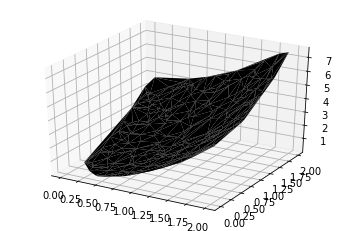

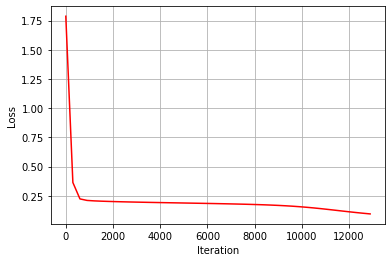

TEST RESULT
MAE 0.37:  MSE 0.20: 


In [5]:
network = initialize_network()

#Train Data
random.seed(33)

x =np.array([ random.uniform(0,2) for _ in range(n_trainSample) ])
y =np.array([ random.uniform(0,2) for _ in range(n_trainSample) ])

T =  x**2 + y**2
X_train= [[x[i],y[i]] for i in range(len(x))]
X_train= np.array(X_train)
T = np.array(T)

# Train
hist_losses,epoch = train(error_rate)

#3D Train Data Graph
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(x, y, T, color="Black",linewidth=0.2, antialiased=True)
plt.show()


#iteration vs loss graph
x_axis = [i*n_trainSample for i in range(epoch)]
plt.figure()
plt.plot(x_axis,hist_losses,linestyle = '-',color="Red")
plt.grid()
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

# Test Data
x = np.linspace(0, 2, n_testSample)
y = np.linspace(0, 2, n_testSample)
random.shuffle(x)
random.shuffle(y)
X_test = [[x[i],y[i]] for i in range(len(x))]

#prediction
pred= list()
for i in range(len(X_test)):
    pred.append(predict(X_test[i], network))

Z1 = (x ** 2 + y ** 2).reshape(n_testSample)  #target
Z2 = (np.array(pred)).reshape(n_testSample)   #predicted

print('TEST RESULT\n'
      'MAE %.2f: '%mean_absolute_error(Z1,Z2),
      'MSE %.2f: '%mean_squared_error(Z1,Z2),
      )

#prediction of Z values graph
x_axis = [i for i in range(n_testSample)]


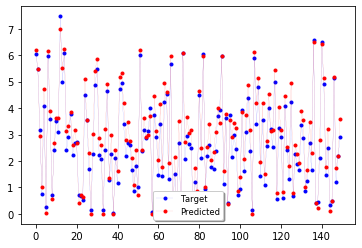

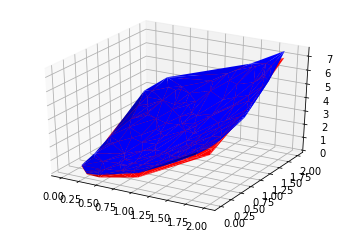

In [6]:
plt.figure()
plt.plot(x_axis,Z1,linestyle = 'dashed',color='blue',
         marker = '.',label='Target',linewidth = '0.1')
plt.plot(x_axis,pred,linestyle = 'dashed',color='red',
         marker = '.',label='Predicted',linewidth = '0.1')
legend = plt.legend(loc='lower center', shadow=True, fontsize='small')
plt.show()

#3d target vs predicted graph
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(x, y, Z1, color='blue',linewidth=0.2, antialiased=True,label='Target')
ax.plot_trisurf(x, y, Z2, color='red',linewidth=0.2, antialiased=True,label='Predicted')
plt.show()

# Question 2

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.matlib
from sklearn.metrics import accuracy_score
import pandas as pd
numpy.random.seed(42)

In [8]:
Hours=[0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,5.00,5.50]

In [9]:
Pass=[0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1]

In [10]:
len(Hours)==len(Pass)

True

In [11]:
df = pd.DataFrame(
    {'Hours': Hours,
     'Pass': Pass
    })

In [12]:
df

,Hours,Pass
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0
5,1.75,0
6,1.75,1
7,2.00,0
8,2.25,1
9,2.50,0


In [13]:
df[df["Pass"]==0]

,Hours,Pass
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0
5,1.75,0
7,2.00,0
9,2.50,0
11,3.00,0
13,3.50,0


In [14]:
X=np.array(df[["Hours"]])
y=np.array(df["Pass"])

In [15]:
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification


print(X.shape)
print(y.shape)





(20, 1)
(20,)


In [16]:
def add_intercept(X):
    intercept = np.ones((X.shape[0], 1))
    return np.concatenate((intercept, X), axis=1)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def calc_h(X, theta):
    z = np.dot(X, theta)
    h = sigmoid(z)
    return h

In [17]:
# DEFINE HYPERPARAMETERS
alpha = 0.01
num_iter = 100000

# FIT MODEL = FIND THE COEFFICIENTS THETA
XX = add_intercept(X)
theta = np.zeros(XX.shape[1])
m = y.size

cost_list = []

for i in range(num_iter):
    h = calc_h(XX, theta)
    
    cost = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    cost_list.append(cost)
    
    gradient = np.dot(XX.T, (h - y)) / m
    theta -= alpha * gradient  # gradient descent


    if i % 10000 == 0:
        print('Cost: {}'.format(cost))

print('Coefficient: {}'.format(theta))

Cost: 0.6931471805599453
Cost: 0.403871191047206
Cost: 0.40159808556960697
Cost: 0.4014993922207254
Cost: 0.4014942214470114
Cost: 0.40149393962159463
Cost: 0.4014939241213968
Cost: 0.4014939232670923
Cost: 0.40149392321998334
Cost: 0.40149392321738536
Coefficient: [-4.07771241  1.50464508]


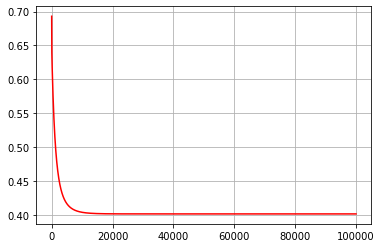

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Score Numpy: 0.8


In [18]:
# plot loss
plt.figure()
plt.plot(range(num_iter), cost_list,color="Red")
plt.grid()
plt.show()


# MAKE PREDICTIONS = USE THE COEFFICIENTS THETA TO ESTIMATE THE PREDICTION PROBABILITIES
preds_prob = calc_h(XX, theta)
preds = preds_prob.round()
print(preds)
print('Score Numpy: {}'.format((preds == y).mean()))


In [19]:
theta

array([-4.07771241,  1.50464508])

In [20]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

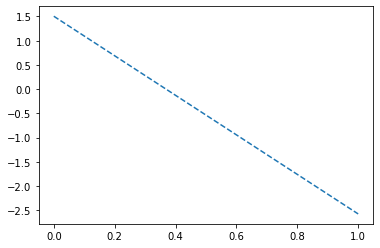

In [21]:
abline(theta[0],theta[1])

In [22]:
class1=np.array(df[df["Pass"]==0])

In [23]:
class2=np.array(df[df["Pass"]==1])


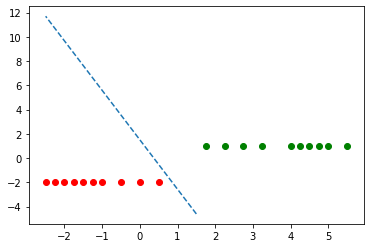

In [24]:
intercept=theta[1]
slope=theta[0]
axes = plt.gca()
x_vals = np.linspace(1.5,-2.5,10)
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, '--')
plt.scatter(class1[:,0]-3,class1[:,1]-2,color="Red")
plt.scatter(class2[:,0],class2[:,1],color="Green")